In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from os.path import join

plt.style.use(["seaborn", "thesis"])

In [3]:
plt.rc("figure", figsize=(8,6))

In [4]:
figure_save_path = "/home/jo/Repos/MastersThesis/SMatrixDescriptor/figures/"

# Data 

In [14]:

from SCFInitialGuess.utilities.dataset import extract_triu_batch, AbstractDataset
from sklearn.model_selection import train_test_split

data_path = "../../../butadien/data/400"
postfix = "400"
dim = 26
#data_path = "../../dataset/TSmall_sto3g"
#postfix = "TSmall_sto3g"
#dim = 26
#data_path = "../butadien/data/"
#postfix = ""
#dim = 26


def split(x, y, ind):
    return x[:ind], y[:ind], x[ind:], y[ind:]

S = np.load(join(data_path, "S" + postfix + ".npy"))
P = np.load(join(data_path, "P" + postfix + ".npy"))
F = np.load(join(data_path, "F" + postfix + ".npy"))

molecules = np.load(join(data_path, "molecules" + postfix + ".npy"))

# Utils 

In [15]:
import seaborn as sns

def matrix_error(error, xlabel=None, ylabel=None, ButadienMode=False, **kwargs):
    
    ax = sns.heatmap(
        error, 
        cmap="viridis", 
        #cmap="plasma",
        #cmap="YlGnBu", 
        #cmap="winter",
        #cmap="summer",
        #cmap="gist_earth",
        #cmap="ocean",
        square=True,
        **kwargs
    )
    #ax.set_xlabel(xlabel)
    #ax.set_ylabel(ylabel)
    
    cbar_min = np.min(error)
    cbar_max = np.max(error)
    cbar_step = (cbar_max - cbar_min) / 5
    
    cbar = ax.collections[0].colorbar
    cbar.ax.set_yticklabels(
        [
            '{:0.1E}'.format(x) for x in np.arange(cbar_min, cbar_max + cbar_step, cbar_step)
        ]
    )        

    if ButadienMode:
        C_labels = ["1s  ", "2s  ", "2px", "2py", "2pz"]
        H_labels = ["1s  "]
        labels = [
             "C" + str(ci) + ": " + orbital \
                for ci in range(1,5) for orbital in C_labels
        ] + [
            "H" + str(hi) + ": " + orbital \
                for hi in range(1,7) for orbital in H_labels
        ]


        plt.yticks(np.arange(26)+0.5, labels, rotation=0) 
        plt.xticks(np.arange(26)+0.5, labels, rotation='vertical') 


    plt.tight_layout()
        
    return ax


# SMatrix 

In [18]:
molecules[0].species

['C', 'C', 'C', 'C', 'H', 'H', 'H', 'H', 'H', 'H']

In [19]:
s = S[0].reshape(dim, dim)
s.shape

(26, 26)

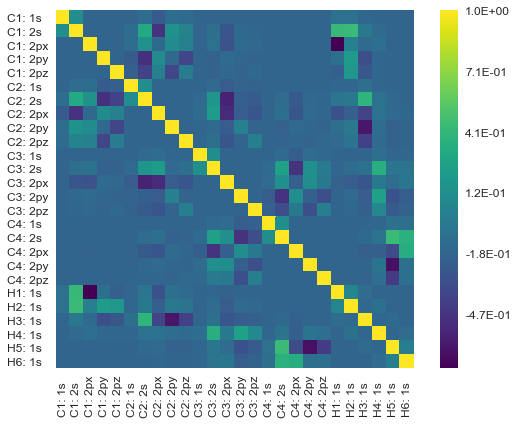

In [20]:
matrix_error(s, ButadienMode=True)

plt.savefig("/home/jo/Repos/MastersThesis/SMatrixDescriptor/figures/Overlap.pdf")
plt.show()